<a href="https://colab.research.google.com/github/SrishtiSharma645/Project-on-ML/blob/main/diabetes_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVC  ON DIABETES DATASET**
(PREDICTION OF DIABETES)

# 1) Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 2) read csv file

In [ ]:
url="/content/drive/MyDrive/diabetes.csv"
df= pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3) Data Analysis

## understand the dataset

In [ ]:
df.head()            #top five records of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape            #no. of rows and columns

(768, 9)

In [ ]:
df.columns         #column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes           #data types of columns

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.info()           #summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()       #statical summary
# count :- the number of NoN-empty rows in a feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.
#25th Percentile (Q1):first quartile, signifies  25% of data points fall below this value.
#50th %ile (Median or Q2): middle value of the dataset when it is in ordered . Half of the data points are below this value, and half are above.
#75th Percentile (Q3):  third quartile, indicates 75% of the data points are below this value.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**conclusion:** we have saw that min value in many column are 0 , which is medically not possible , so we have to replace it with mean/median.

##Data Cleaning

In [ ]:
df=df.drop_duplicates()      #drop the duplicate rows

In [ ]:
df.isnull().sum()          #check for NULL or missing values
#conclusion: no null values in dataset

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#check for 0 value column wise
print(df[df["Glucose"]==0].shape[0])
print(df[df["BloodPressure"]==0].shape[0])
print(df[df["SkinThickness"]==0].shape[0])
print(df[df["Insulin"]==0].shape[0])
print(df[df["BMI"]==0].shape[0])
# as pregnancy may be 0 ....and age ,DiabetesPedigreeFunction have non zero min value ..so we not check for them.



5
35
227
374
11


As here some of colums have **skewed distribution** (one side more sharper than the other) it means here **mean is more affected by outliers than median**. so we repalce these columns values with median and column with normal distribution repalce it with mean value

so replace 0 values of Glucose and Blood Pressure column with mean(normal distribution)

and replace 0 values of SkinThickness, Insulin,BMI column with median(skewed distribution)

In [ ]:
#replacing 0 value with mean/median
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].median())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].median())
df["BMI"]=df["BMI"].replace(0,df["BMI"].median())


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


# 4) Data Visualization

**count plot**

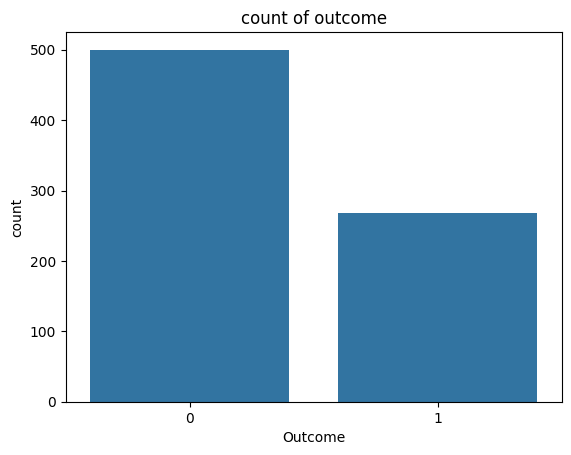

In [ ]:
# counts the occurrences of categories in the data.
# count plot used to see if dataset is balanced or not
sns.countplot(x='Outcome',data=df)
plt.title("count of outcome")
plt.show()


as here we saw that no of people who do not have diabetes is far more than people who do, so we concluded that our **data is not balanced.**

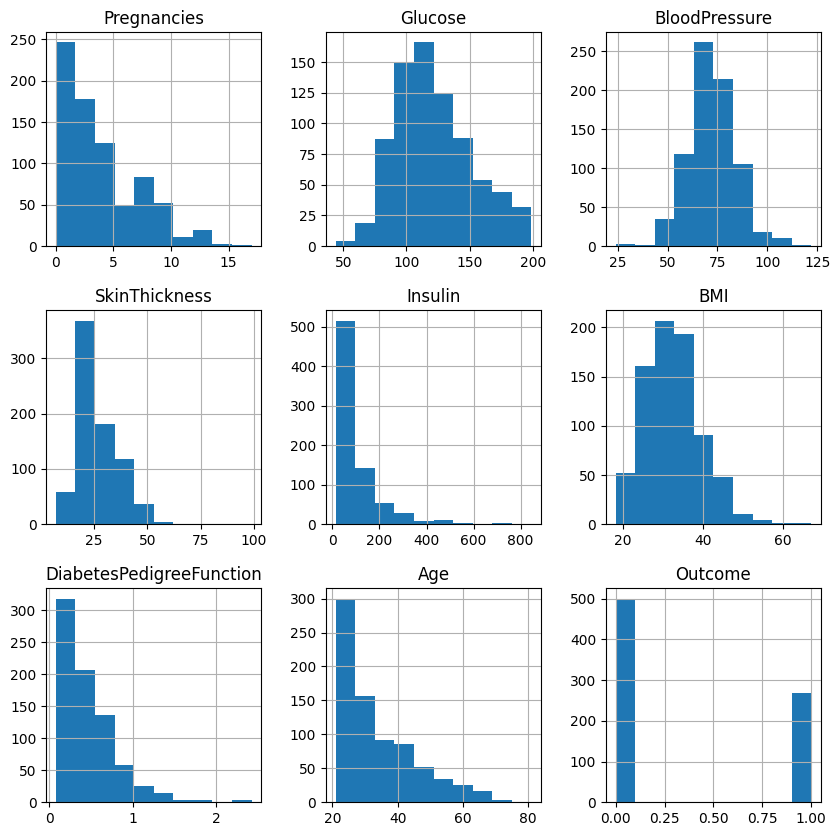

In [ ]:
#it is used to see whether dataset is normally distributed or skewed
# gives frequency of x val in y axis
df.hist(bins=10,figsize=(10,10))
plt.show()


Here only Glucose and BloodPressure are normally distributed, rest all other are skewed and have outliers.

**Box Plot**

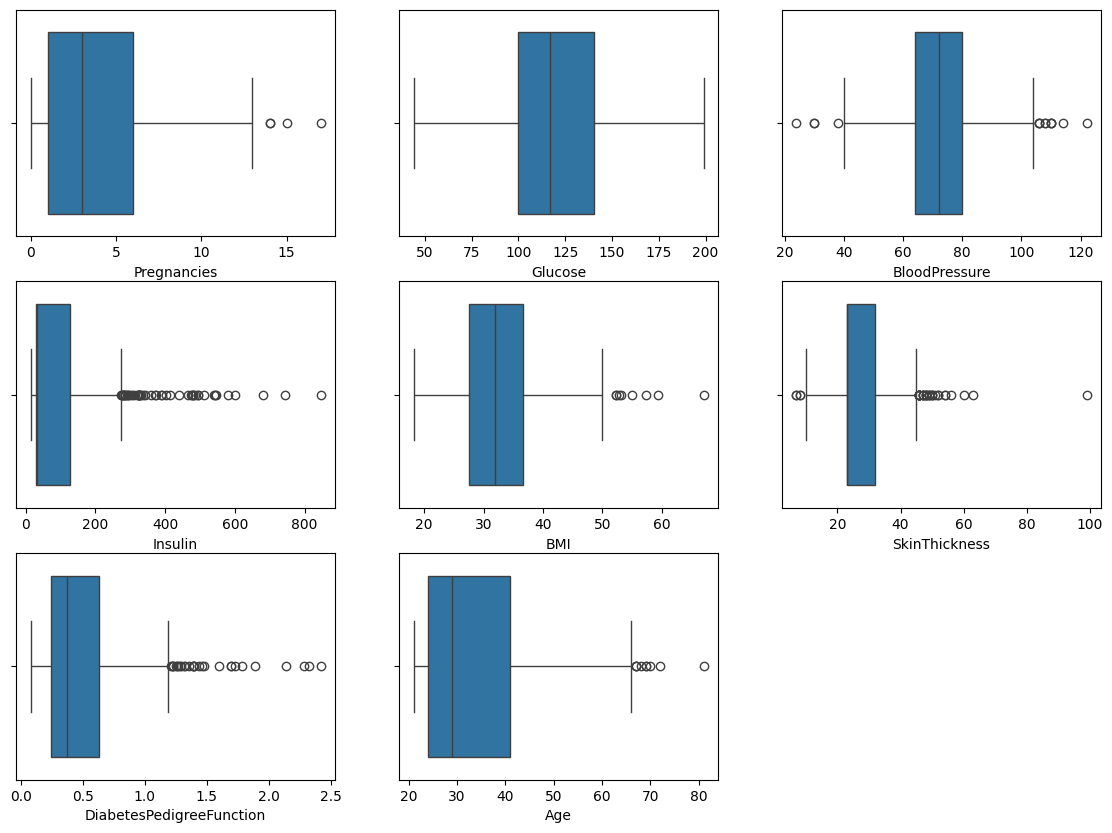

In [ ]:
#it is used to analyse the distribution and see the outliers
plt.figure(figsize=(14,10))
plt.subplot(3,3,1)            #subplot(row,col,position)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Age',data=df)
plt.show()

here removing outliers can cause data loss ,so we have to deal with it using various scaling and transformation techniques.

**scatter plot**

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

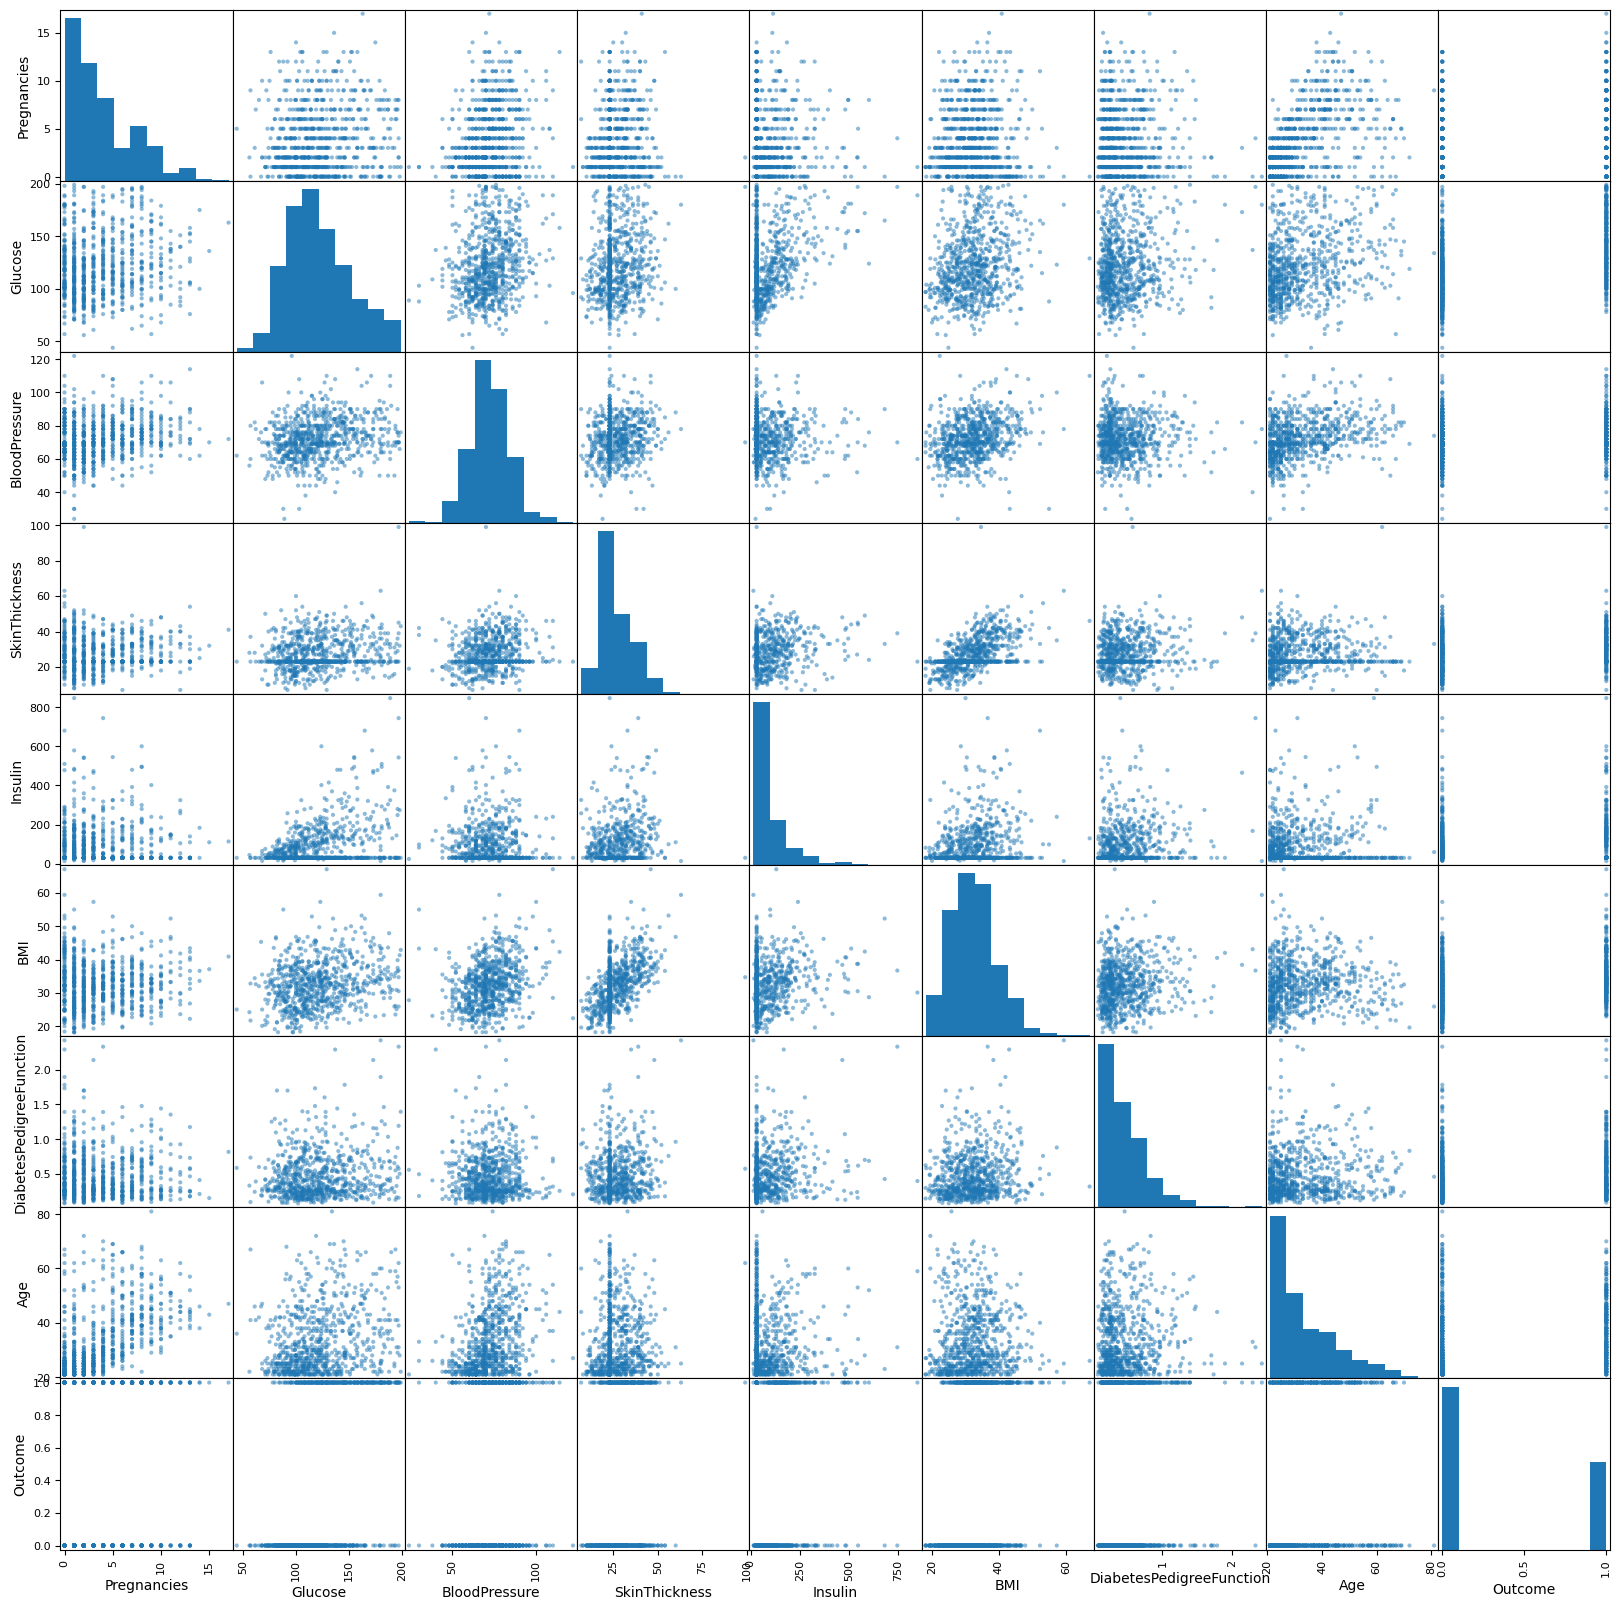

In [ ]:
#it is used to understand relationship b/w any two variables
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))

as here we saw that women with higher no of pregnancies have lower insulin.

# 5) Feature Selection

**heatmap**

we use heatmap to find the correlation between columns.
here value ranges from -1 to +1

 1 means that they are highly correlated(one variable increases, the other tends to also increase.)

 -1 means that  one variable increases then the other tends to decrease  

 and 0 means no correlation.

<Axes: >

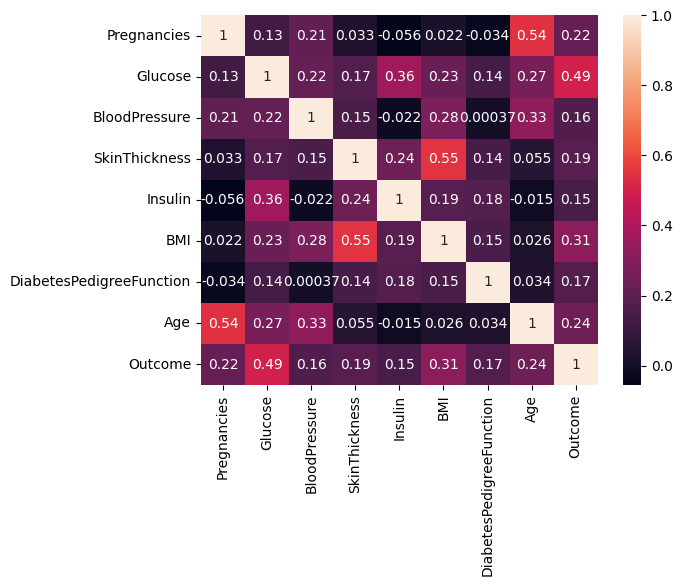

In [ ]:
corrmat=df.corr()   #correlation matrix
sns.heatmap(corrmat,annot=True)      #annot displaying the numeric value each cell represents.

By observing the last column "Outcome" we concluded that glucose,bmi ,age are most correlated with outcome

and,BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, so they are not contribute much to the model...so we can drop them.

In [ ]:
df_new=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis=1)
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1


# 6) split the data into x and y

In [ ]:
y=df_new["Outcome"]                       #y=df_new.iloc[:,-1]
x=df_new.drop("Outcome",axis=1)           #x=df_new.iloc[:,:5]

In [ ]:
x.head()          #contain only independent features

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,6,148.0,35,33.6,50
1,1,85.0,29,26.6,31
2,8,183.0,23,23.3,32
3,1,89.0,23,28.1,21
4,0,137.0,35,43.1,33


In [ ]:
y.head()           #contain dependent features

,Outcome
0,1
1,0
2,1
3,0
4,1


#7) Scaling

In [ ]:
#applying scaler transform
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 8) Train Test Split

It is used to evaluate the performance of the algorithm.
* Train Dataset: Used to fit the machine learning model.

* Test Dataset: Used to evaluate the fit machine learning model.

generally we use 80% for train and 20% for test.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)       # 20 % data for test
#random_state means it prevent shuffling of data each time ...it can be any integer value

In [ ]:
x_train.shape , y_train.shape

((614, 5), (614,))

In [ ]:
x_test.shape , y_test.shape

((154, 5), (154,))

# 9)  Create a model and Fit the data

In [ ]:
model = SVC(kernel='poly', C=100, probability=True)  # probability=True allows you to get probabilities



In [ ]:
# Fit the model to the training data
model.fit(x_train, y_train)


SVC(C=100, kernel='poly', probability=True)

# 10) Prediction

In [ ]:
result = svc_model.predict(x_test)

In [ ]:
result

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

#11) model accuracy

## Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, result)
print(accuracy)

0.7792207792207793


## Classification Report

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.74      0.43      0.54        47

    accuracy                           0.78       154
   macro avg       0.76      0.68      0.70       154
weighted avg       0.77      0.78      0.76       154



## Precision, Recall and F1-Score

**Precision:** The ratio of true positives to the sum of true positives and false positives.

**Recall:** The ratio of true positives to the sum of true positives and false negatives.

**F1-Score:** The harmonic mean of precision and recall.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, result)
recall = recall_score(y_test, result)
f1 = f1_score(y_test, result)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.7407407407407407
Recall: 0.425531914893617
F1-Score: 0.5405405405405406


In [ ]:
# If you want to predict probabilities instead of classes
y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability of class 1
print(f"Probability of having diabetes: {y_pred_proba[0] * 100:.2f}%")

Probability of having diabetes: 72.98%


**all together**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url = "/content/drive/MyDrive/diabetes.csv"
df = pd.read_csv(url)

# Data preprocessing
df = df.drop_duplicates()
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].median())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].median())
df["BMI"] = df["BMI"].replace(0, df["BMI"].median())

# Drop unnecessary columns
df_new = df.drop(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'], axis=1)

# Split the data into features (x) and target (y)
y = df_new["Outcome"]
x = df_new.drop("Outcome", axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Use SVC (Support Vector Classifier) instead of SVR
model = SVC(kernel='poly', C=100, probability=True)  # probability=True allows you to get probabilities
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# If you want to predict probabilities instead of classes
y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability of class 1
print(f"Probability of having diabetes: {y_pred_proba[0] * 100:.2f}%")

Accuracy: 77.27%
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       107
           1       0.68      0.49      0.57        47

    accuracy                           0.77       154
   macro avg       0.74      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154

Probability of having diabetes: 88.66%
